In [1]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from label_ranking import *
from massart import *
from lr_regressors import DecisionTreeScore, RandomForestScore


d = 10  # data dimension
k = 5  # labels

# Feature vectors distribution
D = multivariate_normal(mean=np.zeros(d), cov=np.identity(d))

# Linear Sorting Function
W_opt = np.random.rand(k, d)

# Train data
X_train = D.rvs(size=20000)

R_train = ground_truth_permutations(X_train, W_opt)
P_train = np.array([np.argsort(ranking) for ranking in R_train])

# Test data
X_test = D.rvs(size=10000)

R_test = ground_truth_permutations(X_test, W_opt)
P_test = np.array([np.argsort(ranking) for ranking in R_test])

In [2]:
eta_max = 0.1

R_train_noisy = np.array([addNoise(y, eta_max) for y in R_train])
P_train_noisy = np.array([np.argsort(ranking) for ranking in R_train_noisy])

avg_KTdist_DTR = DecisionTreeScore(X_train, P_train_noisy, X_test, P_test)
print("Decision tree regressor average accuracy:", 1 - avg_KTdist_DTR)

avg_KTdist_RFR = RandomForestScore(X_train, P_train_noisy, X_test, P_test)
print("Random forest regressor average accuracy:", 1 - avg_KTdist_RFR)

Decision tree regressor average accuracy: 0.76667
Random forest regressor average accuracy: 0.92345


In [3]:
eta_max = 0.2

R_train_noisy = np.array([addNoise(y, eta_max) for y in R_train])
P_train_noisy = np.array([np.argsort(ranking) for ranking in R_train_noisy])

avg_KTdist_DTR = DecisionTreeScore(X_train, P_train_noisy, X_test, P_test)
print("Decision tree regressor average accuracy:", 1 - avg_KTdist_DTR)

avg_KTdist_RFR = RandomForestScore(X_train, P_train_noisy, X_test, P_test)
print("Random forest regressor average accuracy:", 1 - avg_KTdist_RFR)

Decision tree regressor average accuracy: 0.6915600000000001
Random forest regressor average accuracy: 0.9031199999999999


In [4]:
eta_max = 0.3

R_train_noisy = np.array([addNoise(y, eta_max) for y in R_train])
P_train_noisy = np.array([np.argsort(ranking) for ranking in R_train_noisy])

avg_KTdist_DTR = DecisionTreeScore(X_train, P_train_noisy, X_test, P_test)
print("Decision tree regressor average accuracy:", 1 - avg_KTdist_DTR)

avg_KTdist_RFR = RandomForestScore(X_train, P_train_noisy, X_test, P_test)
print("Random forest regressor average accuracy:", 1 - avg_KTdist_RFR)

Decision tree regressor average accuracy: 0.62452
Random forest regressor average accuracy: 0.86707


In [5]:
eta_max = 0.4

R_train_noisy = np.array([addNoise(y, eta_max) for y in R_train])
P_train_noisy = np.array([np.argsort(ranking) for ranking in R_train_noisy])

avg_KTdist_DTR = DecisionTreeScore(X_train, P_train_noisy, X_test, P_test)
print("Decision tree regressor average accuracy:", 1 - avg_KTdist_DTR)

avg_KTdist_RFR = RandomForestScore(X_train, P_train_noisy, X_test, P_test)
print("Random forest regressor average accuracy:", 1 - avg_KTdist_RFR)

Decision tree regressor average accuracy: 0.55967
Random forest regressor average accuracy: 0.76779


In [7]:
eta_max = 0.499

R_train_noisy = np.array([addNoise(y, eta_max) for y in R_train])
P_train_noisy = np.array([np.argsort(ranking) for ranking in R_train_noisy])

avg_KTdist_DTR = DecisionTreeScore(X_train, P_train_noisy, X_test, P_test)
print("Decision tree regressor average accuracy:", 1 - avg_KTdist_DTR)

avg_KTdist_RFR = RandomForestScore(X_train, P_train_noisy, X_test, P_test)
print("Random forest regressor average accuracy:", 1 - avg_KTdist_RFR)

Decision tree regressor average accuracy: 0.5062200000000001
Random forest regressor average accuracy: 0.50787


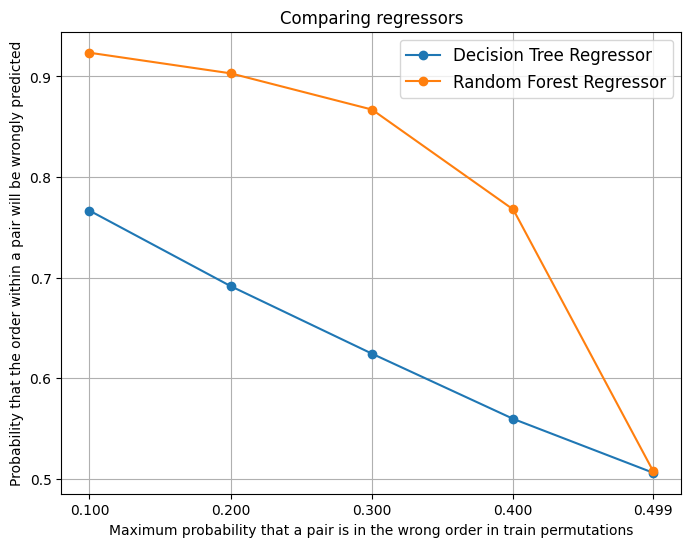

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title('Comparing regressors')
plt.plot([0.1, 0.2, 0.3, 0.4, 0.499], [0.7667, 0.6916, 0.6245, 0.5597, 0.5062],'-o')
plt.plot([0.1, 0.2, 0.3, 0.4, 0.499], [0.9236, 0.9031, 0.8671, 0.7678, 0.5079],'-o')
plt.legend(['Decision Tree Regressor', 'Random Forest Regressor'], fontsize=12)
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.499])
plt.xlabel('Maximum probability that a pair is in the wrong order in train permutations')
plt.ylabel('Probability that the order within a pair will be wrongly predicted')
plt.grid()
plt.show()